In [2]:
# Import necessary libraries for data manipulation, modeling, and evaluation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn import metrics
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  classification_report
import xgboost as xgb

In [3]:
# Load the dataset from a CSV file into a pandas DataFrame.
df = pd.read_csv("/Users/jd/UNI/BigData/BigDataProject-Classification/Rate/Rate_Cleaned.csv",index_col=0)

In [4]:
import numpy as np
# Assuming the dataset is very large, select the random 5,000 rows as a subset for analysis to manage memory and computational efficiency.

num_rows = df.shape[0]
random_rows = np.random.choice(num_rows, size=5000, replace=False)
# Select 5000 rows randomly of the DataFrame
subset_df = df.iloc[random_rows, :]



In [5]:
subset_df.shape[0]

5000

In [6]:
# Define the features (independent variables) and the target (dependent variable) for the machine learning model.
features = [ 'StateCode', 'SourceName', 'RatingAreaId', 'Tobacco', 'Age', 'PrimarySubscriberAndThreeOrMoreDependents','tobacco_rate']
target = 'PlanId'


In [7]:
# Initialize a LabelEncoder to convert categorical text data into model-usable numerical data.
le = LabelEncoder()
# Apply LabelEncoder to each categorical column to transform text into numerical data for modeling.
subset_df['SourceName'] = le.fit_transform(subset_df['SourceName'])
subset_df['StateCode'] = le.fit_transform(subset_df['StateCode'])
subset_df['Tobacco'] = le.fit_transform(subset_df['Tobacco'])
subset_df['PlanId'] = le.fit_transform(subset_df['PlanId'])
subset_df['RatingAreaId'] = le.fit_transform(subset_df['RatingAreaId'])

/var/folders/f4/8dds3qh10qs02hl__y6qrddr0000gp/T/ipykernel_48217/1937701101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['SourceName'] = le.fit_transform(subset_df['SourceName'])
/var/folders/f4/8dds3qh10qs02hl__y6qrddr0000gp/T/ipykernel_48217/1937701101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['StateCode'] = le.fit_transform(subset_df['StateCode'])
/var/folders/f4/8dds3qh10qs02hl__y6qrddr0000gp/T/ipykernel_48217/1937701101.py:6: SettingWithCopyWarning: 
A value is tryi

In [8]:
# Split the dataset into training and testing sets to prepare for model training and evaluation. 80% of the data is used for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(subset_df[features], subset_df[target], test_size=0.2, random_state=42)

In [9]:
# Initialize the XGBoost classifier model.
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model using the training data.
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [10]:
# Use the trained model to predict the target variable for the test set.
y_pred = xgb_model.predict(X_test)

# Evaluate the model's performance using the F1 score, which considers both precision and recall, and is especially useful for imbalanced datasets.
print(f"F1 Score: {sklearn.metrics.f1_score(y_test,y_pred,average='weighted')}")


F1 Score: 0.7503944430927117


In [11]:
# Perform cross-validation to assess the model's stability and performance across different subsets of the training data.
scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean score: {scores.mean():.2f}")

/Users/jd/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.73    0.72875 0.735   0.7425  0.72125]
Mean score: 0.73


In [12]:
# Use GridSearchCV to find the optimal model parameters.
param_grid = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Display the best parameters found by GridSearchCV and the corresponding cross-validation score.
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

/Users/jd/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'learning_rate': 0.1, 'max_depth': 7}
Best cross-validation score: 0.68


In [13]:
# Finally, print a detailed classification report that includes precision, recall, f1-score, and support for each class.
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.00      0.00      0.00         0
           3       1.00      1.00      1.00        33
           4       0.78      0.93      0.85        27
           5       1.00      1.00      1.00        30
           6       0.15      0.19      0.17        31
           7       0.07      0.06      0.07        34
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00        21
          13       0.00      0.00      0.00        33
          14       0.05      0.04      0.04        26
          15       0.00      0.00      0.00        27
          16       0.91      1.00      0.95        21
          17       0.79      0.54      0.64        28
          18       0.65      0.68      0.67        25
          19       0.90    

/Users/jd/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jd/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jd/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jd/anaconda3/lib/python3.11/site-packa

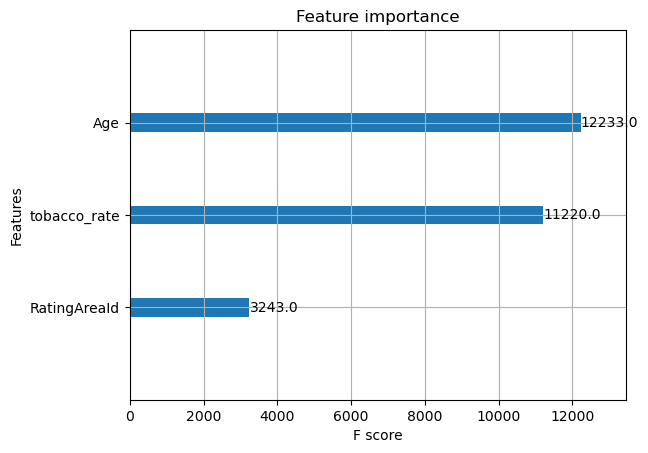

In [14]:
xgb.plot_importance(xgb_model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()